#### Saikiran N. Pasikanti
## Machine Learning Foundation
# SVM_Naive Bayes
Build Naive Bayes and SVM Model using "Bank" dataset provided to you. Perform the following Operations.
- a) Read and view data in R
- b) Use Appropriate method to find out the Significant variables.
- c) Divide the dataset into Development and Validation Samples.
- d) Build SVM Model using linear Kernel and check Accuracy using Validation samples.
- e) Build SVM Model using Radial Basis Kernel and check Accuracy using Validation samples, tune the model for best Result.
- f) Also Use Naive Bayes Algorithm for classification and Compare the results with SVM.

In [1]:
################  READING THE DATASET                  ######################
setwd("C:\\Users\\saikiran\\Documents\\GitHub\\MLF Foundation using R\\SVM_Naive Bayes")          # Set the working directory
bank <- read.csv("bank.csv", sep=";")                  # Read the data set
original <- bank                                       # Back up of Original dataset

In [2]:
################  DATA EXPLORATION                     ######################
str(bank)                                              # Except age, balance, day, duration, 
                                                       # campaign, pdays, previous all other
                                                       # variables are factors

'data.frame':	4521 obs. of  17 variables:
 $ age      : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 3 2 2 3 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 3 3 2 3 3 2 3 1 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 3 1 1 1 3 1 ...
 $ day      : int  19 11 16 3 5 23 14 6 14 17 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 11 9 1 7 9 4 9 9 9 1 ...
 $ duration : int  79 220 185 199 226 141 341 151 57 313 ...
 $ campaign : int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays    : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ p

In [3]:
dim(bank)                                              # 4521 obs. of 11 variables

[1] 4521   17

In [5]:
table(bank$y)                                             
## The given data set is skewed towards to NO


  no  yes 
4000  521 

In [6]:
names(bank)                                            # 10 independent variables, 1 outcome

[1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "y"

In [7]:
sum(is.na(bank))                                       # No missing values

[1] 0

In [8]:
summary(bank)                                          # Basix statistical information
## Variable "education" has unknown data
## As per the variable "default" most of them have default loan
## Variable "balance" is highly skewed towards negative or zero amount
## Variable default is highly skewed towards to NO
## Variable "contact" has unknown data
## In May month most calls have taken place
## Variable "pdays" has negative values
## Variable "previous" has zero values
## Variable "poutcome" has unknown and other values
## It can be observed that No two variables are highly correlated

      age                 job          marital         education    default   
 Min.   :19.00   management :969   divorced: 528   primary  : 678   no :4445  
 1st Qu.:33.00   blue-collar:946   married :2797   secondary:2306   yes:  76  
 Median :39.00   technician :768   single  :1196   tertiary :1350             
 Mean   :41.17   admin.     :478                   unknown  : 187             
 3rd Qu.:49.00   services   :417                                              
 Max.   :87.00   retired    :230                                              
                 (Other)    :713                                              
    balance      housing     loan           contact          day       
 Min.   :-3313   no :1962   no :3830   cellular :2896   Min.   : 1.00  
 1st Qu.:   69   yes:2559   yes: 691   telephone: 301   1st Qu.: 9.00  
 Median :  444                         unknown  :1324   Median :16.00  
 Mean   : 1423                                          Mean   :15.92  
 3rd Qu.

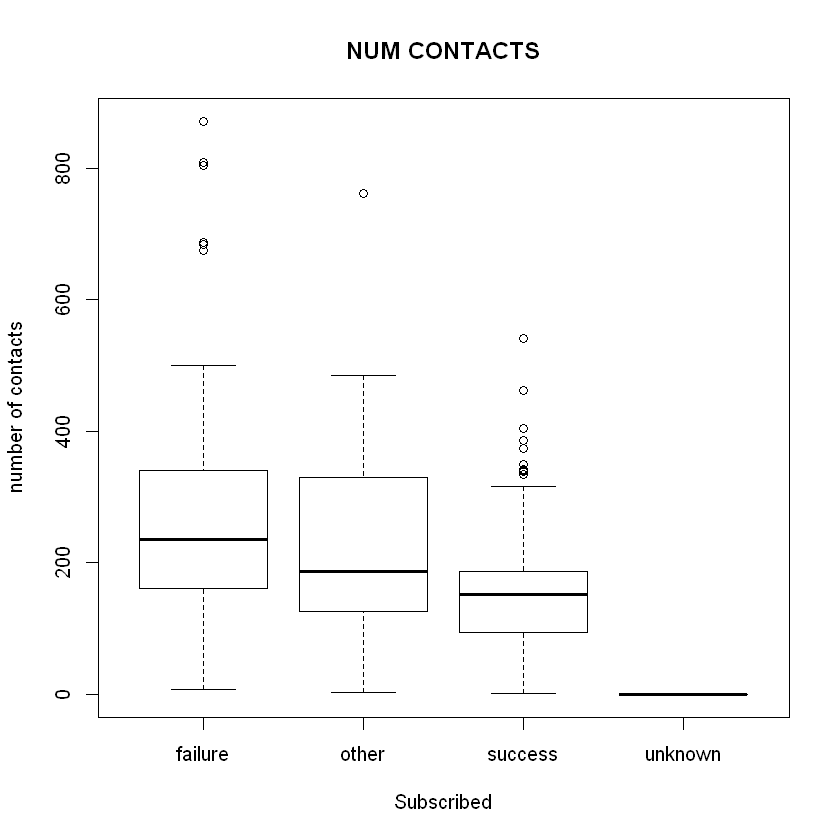

In [11]:
################  DATA VISUALISATION                     ######################
## Continous Variables
boxplot(bank$pdays~bank$poutcome, main="NUM CONTACTS",ylab="number of contacts",xlab="Subscribed")

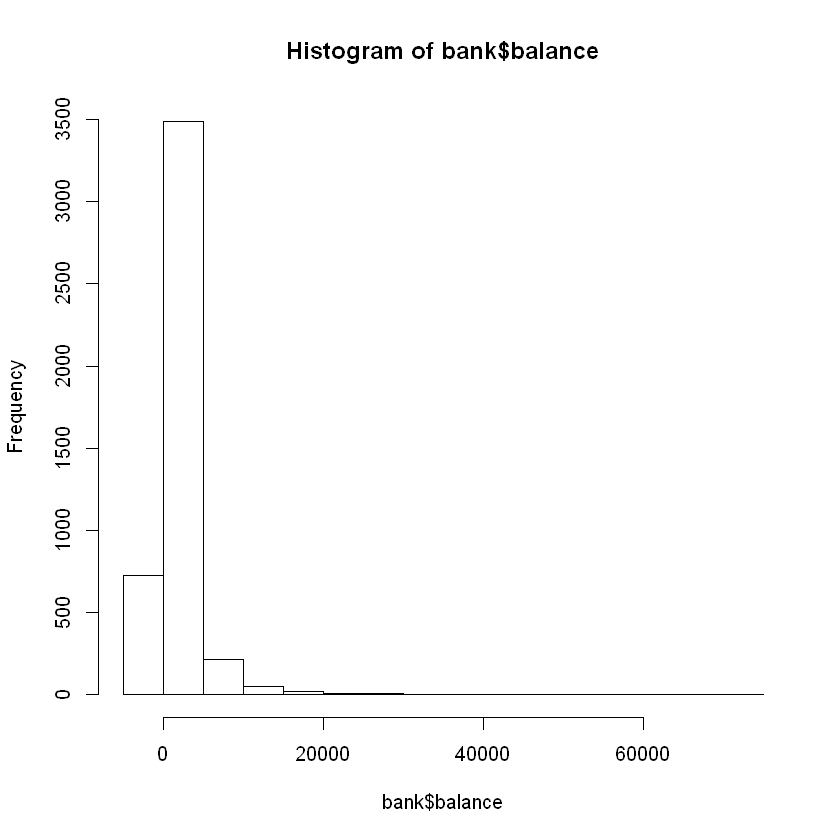

In [12]:
## Categorical Variables
hist(bank$balance)


       admin.   blue-collar  entrepreneur     housemaid    management 
          478           946           168           112           969 
      retired self-employed      services       student    technician 
          230           183           417            84           768 
   unemployed       unknown          <NA> 
          128            38             0 

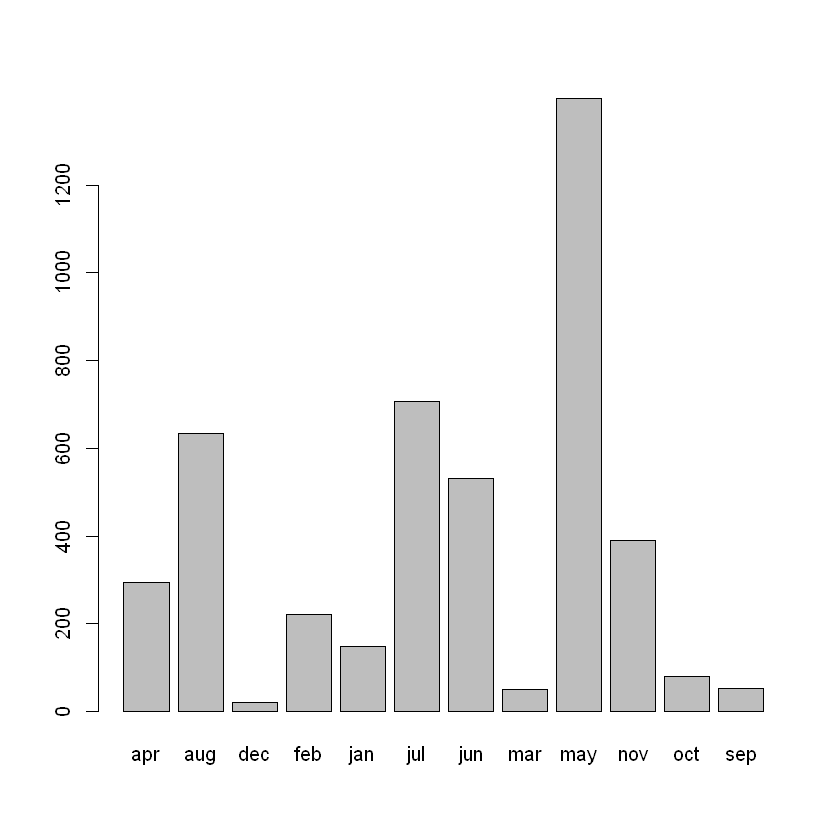

In [13]:
plot(bank$month)

table(bank$job , useNA = c("always"))

In [18]:
################  SIGNIFICANT VARIABLES USING C50        ######################
## Let's fid out the significant variables using C50 algorithm
#install.packages("C50")
library(C50)                                             # Load C50 library

model <- C5.0(bank[-17], bank$y, trials = 5 )            # Basic C50 model built on the whole data set
model


Call:
C5.0.default(x = bank[-17], y = bank$y, trials = 5)

Classification Tree
Number of samples: 4521 
Number of predictors: 16 

Number of boosting iterations: 5 
Average tree size: 37.8 

Non-standard options: attempt to group attributes


In [19]:
model$trials                                             # Number of trials = 5

Requested    Actual 
        5         5

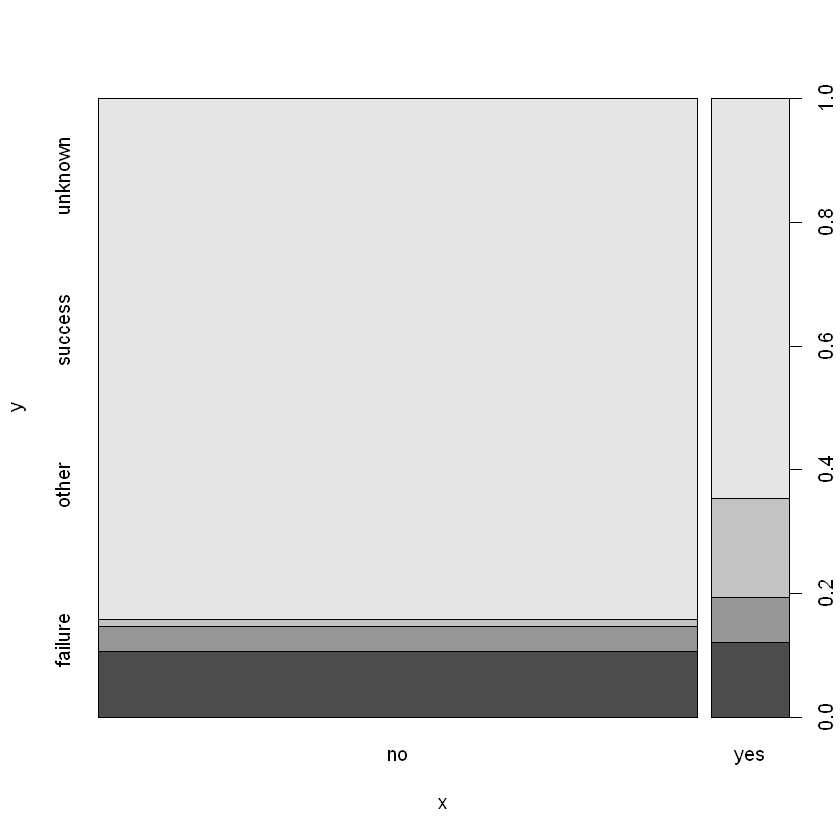

In [20]:
plot(bank$y, bank$poutcome)

In [21]:
## The list of significant variables as per the above model are as follows:
library(caret)

varImp(model)                                            # Significance of all variables
##  The variables "duration", "poutcome", "month", "contact", "age" highly significant variables

Loading required package: lattice
Loading required package: ggplot2
Warning message in (varStart + 1):length(treeDat):
"numerical expression has 2 elements: only the first used"

,Overall
duration,100.00
poutcome,100.00
month,99.96
contact,96.55
age,90.78
pdays,58.42
day,50.17
previous,40.88
job,39.81
default,27.69


In [22]:
##  Dropping the insignificant variables out of the data set
v <- c("housing", "education", "marital")
bank[,v] <- NULL

dim(bank)

[1] 4521   14

In [23]:
str(bank)

'data.frame':	4521 obs. of  14 variables:
 $ age     : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job     : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ default : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ loan    : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ contact : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 3 1 1 1 3 1 ...
 $ day     : int  19 11 16 3 5 23 14 6 14 17 ...
 $ month   : Factor w/ 12 levels "apr","aug","dec",..: 11 9 1 7 9 4 9 9 9 1 ...
 $ duration: int  79 220 185 199 226 141 341 151 57 313 ...
 $ campaign: int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays   : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ previous: int  0 4 1 0 0 3 2 0 0 2 ...
 $ poutcome: Factor w/ 4 levels "failure","other",..: 4 1 1 4 4 1 2 4 4 1 ...
 $ y       : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


In [24]:
################  DATASET SPLITTING = DEV / VAL           ######################
library(caTools)                                          # load required library

set.seed(123)                                             # for reproducibility
split1 = sample.split(bank$y, SplitRatio = 0.75)

b.train = subset(bank, split1 == TRUE)                    # development data set
b.test = subset(bank, split1 == FALSE)                    # validation data set

table(b.train$y)                                          # Train dat skewed towards NO
# no  yes 
# 3000  391


  no  yes 
3000  391 

In [25]:
################  SVM MODEL (With Linear Kernel)          ######################
library(e1071)                                            # for svm() function
svm1 <- svm( y~., data=b.train, kernel='linear')    # svm model using linear kernel

summary(svm1)                                       # 


Call:
svm(formula = y ~ ., data = b.train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.02702703 

Number of Support Vectors:  844

 ( 472 372 )


Number of Classes:  2 

Levels: 
 no yes




In [26]:
pred1 <- predict(svm1,b.test)                             # Predicting the data on validation
print(confusionMatrix(data = pred1, reference = b.test$y))# Confusion Matrix

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  986 108
       yes  14  22
                                          
               Accuracy : 0.892           
                 95% CI : (0.8725, 0.9095)
    No Information Rate : 0.885           
    P-Value [Acc > NIR] : 0.2441          
                                          
                  Kappa : 0.2265          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9860          
            Specificity : 0.1692          
         Pos Pred Value : 0.9013          
         Neg Pred Value : 0.6111          
             Prevalence : 0.8850          
         Detection Rate : 0.8726          
   Detection Prevalence : 0.9681          
      Balanced Accuracy : 0.5776          
                                          
       'Positive' Class : no              
                                          


In [27]:
################  SVM MODEL (With Radial Kernel)          ######################
svm2 <- svm(y~., data=b.train, kernel="radial",
             gamma=0.1,                                   # Initially very small gamma and cost
             cost=1)
summary(svm2)


Call:
svm(formula = y ~ ., data = b.train, kernel = "radial", gamma = 0.1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  953

 ( 571 382 )


Number of Classes:  2 

Levels: 
 no yes




In [28]:
pred2 <- predict(svm2, b.test)
print(confusionMatrix(data = pred2,  reference = b.test$y))

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  982 103
       yes  18  27
                                          
               Accuracy : 0.8929          
                 95% CI : (0.8734, 0.9104)
    No Information Rate : 0.885           
    P-Value [Acc > NIR] : 0.2153          
                                          
                  Kappa : 0.2651          
 Mcnemar's Test P-Value : 2.234e-14       
                                          
            Sensitivity : 0.9820          
            Specificity : 0.2077          
         Pos Pred Value : 0.9051          
         Neg Pred Value : 0.6000          
             Prevalence : 0.8850          
         Detection Rate : 0.8690          
   Detection Prevalence : 0.9602          
      Balanced Accuracy : 0.5948          
                                          
       'Positive' Class : no              
                                          


In [29]:
##  Tuning the above svm model for better accuracy
svm2.tuned <- tune(svm,  y~.,data=b.train,kernel="radial", ranges=list(cost=c(0.1, 1, 5, 10, 100), gamma=c(0.01,0.05,1,2,3,4)))

bestmodel <- svm2.tuned$best.model
bestmodel


Call:
best.tune(method = svm, train.x = y ~ ., data = b.train, ranges = list(cost = c(0.1, 
    1, 5, 10, 100), gamma = c(0.01, 0.05, 1, 2, 3, 4)), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.01 

Number of Support Vectors:  798


In [30]:
pred2.tuned <- predict(bestmodel,b.test)

print(confusionMatrix(data = pred2.tuned,  reference = b.test$y))

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  978  93
       yes  22  37
                                          
               Accuracy : 0.8982          
                 95% CI : (0.8791, 0.9152)
    No Information Rate : 0.885           
    P-Value [Acc > NIR] : 0.08651         
                                          
                  Kappa : 0.3444          
 Mcnemar's Test P-Value : 6.686e-11       
                                          
            Sensitivity : 0.9780          
            Specificity : 0.2846          
         Pos Pred Value : 0.9132          
         Neg Pred Value : 0.6271          
             Prevalence : 0.8850          
         Detection Rate : 0.8655          
   Detection Prevalence : 0.9478          
      Balanced Accuracy : 0.6313          
                                          
       'Positive' Class : no              
                                          


In [31]:
################  NAIVEBAYES MODEL                       ######################
nb.model <- naiveBayes(b.test[,-c(14)], b.test[,14])

nb.model
summary(nb.model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = b.test[, -c(14)], y = b.test[, 14])

A-priori probabilities:
b.test[, 14]
       no       yes 
0.8849558 0.1150442 

Conditional probabilities:
            age
b.test[, 14]     [,1]     [,2]
         no  41.51900 10.42143
         yes 41.97692 13.81689

            job
b.test[, 14]     admin. blue-collar entrepreneur  housemaid management
         no  0.11100000  0.21300000   0.03700000 0.02200000 0.20300000
         yes 0.10000000  0.13846154   0.02307692 0.02307692 0.23076923
            job
b.test[, 14]    retired self-employed   services    student technician
         no  0.04700000    0.03500000 0.10100000 0.01500000 0.17400000
         yes 0.10000000    0.03076923 0.07692308 0.05384615 0.16923077
            job
b.test[, 14] unemployed    unknown
         no  0.03400000 0.00800000
         yes 0.03076923 0.02307692

            default
b.test[, 14]         no        yes
         no  0.98900000 0.0110000

        Length Class  Mode     
apriori  2     table  numeric  
tables  13     -none- list     
levels   2     -none- character
call     3     -none- call     

In [32]:
nb.pred <-predict(nb.model, b.test)
print(confusionMatrix(data = nb.pred,  reference = b.test$y))

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  911  63
       yes  89  67
                                          
               Accuracy : 0.8655          
                 95% CI : (0.8442, 0.8849)
    No Information Rate : 0.885           
    P-Value [Acc > NIR] : 0.98031         
                                          
                  Kappa : 0.3923          
 Mcnemar's Test P-Value : 0.04258         
                                          
            Sensitivity : 0.9110          
            Specificity : 0.5154          
         Pos Pred Value : 0.9353          
         Neg Pred Value : 0.4295          
             Prevalence : 0.8850          
         Detection Rate : 0.8062          
   Detection Prevalence : 0.8619          
      Balanced Accuracy : 0.7132          
                                          
       'Positive' Class : no              
                                          
